In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [30]:
qwen_14b = pd.read_csv("qwen3_14b_ndvi.csv")
qwen_32b = pd.read_csv("qwen3_32b_ndvi.csv")
gemma_9b = pd.read_csv("gemma_9b_ndvi.csv")
gemma_27b = pd.read_csv("gemma_27b_ndvi.csv")
llama_70b = pd.read_csv("llama_70b_ndvi.csv")

In [3]:
qwen_14b_usa = pd.read_csv("../USA/qwen3_14b_ndvi_2.csv")
qwen_32b_usa = pd.read_csv("../USA/qwen3_32b_ndvi_2.csv")
gemma_9b_usa = pd.read_csv("../USA/gemma_9b_ndvi_1.csv")
gemma_27b_usa = pd.read_csv("../USA/gemma_27b_ndvi_1.csv")

In [31]:
print(len(qwen_14b), len(qwen_32b), len(gemma_9b), len(gemma_27b))

48240 48240 48240 48240


In [4]:
print(len(qwen_14b_usa))
print(len(qwen_32b_usa))
print(len(gemma_9b_usa))
print(len(gemma_27b_usa))

39940
39940
39940
39940


In [5]:
print("# Null values in qwen_14b:", qwen_14b.isnull().sum().sum())
print("# Null values in qwen_32b:", qwen_32b.isnull().sum().sum())
print("# Null values in gemma_9b:", gemma_9b.isnull().sum().sum())
print("# Null values in gemma_27b:", gemma_27b.isnull().sum().sum())
print("# Null values in llama_70b:", llama_70b.isnull().sum().sum())

# Null values in qwen_14b: 0
# Null values in qwen_32b: 1006
# Null values in gemma_9b: 6080
# Null values in gemma_27b: 0
# Null values in llama_70b: 0


In [32]:
rows_per_ndvi = 2412

In [33]:
def add_ndvi_column(df):
    ndvi_values = np.linspace(-1, 1, 21) # gives 21 values including 0
    ndvi_values = ndvi_values[ndvi_values != 0] # remove 0 → 20 values, but you said 19? Double check this

    # Repeat NDVI values for the dataset
    # If you have 2412 rows per NDVI, and all models stacked, make sure ordering matches
    df["ndvi"] = np.repeat(ndvi_values, rows_per_ndvi)
    return df

In [34]:
add_ndvi_column(qwen_14b)
add_ndvi_column(qwen_32b)
add_ndvi_column(gemma_9b)
add_ndvi_column(gemma_27b)

# add_ndvi_column(qwen_14b_usa)
# add_ndvi_column(qwen_32b_usa)
# add_ndvi_column(gemma_9b_usa)
# add_ndvi_column(gemma_27b_usa)
# add_ndvi_column(llama_70b)

,city,state,year,month,ndvi,model,pm2.5
0,Agartala,Tripura,2023,January,-1.0,google/gemma-2-27b-it,102.0
1,Agartala,Tripura,2023,February,-1.0,google/gemma-2-27b-it,78.0
2,Agartala,Tripura,2023,March,-1.0,google/gemma-2-27b-it,78.0
3,Agartala,Tripura,2023,April,-1.0,google/gemma-2-27b-it,45.0
4,Agartala,Tripura,2023,May,-1.0,google/gemma-2-27b-it,45.0
...,...,...,...,...,...,...,...
48235,Yamuna Nagar,Haryana,2023,August,1.0,google/gemma-2-27b-it,45.0
48236,Yamuna Nagar,Haryana,2023,September,1.0,google/gemma-2-27b-it,75.0
48237,Yamuna Nagar,Haryana,2023,October,1.0,google/gemma-2-27b-it,125.0
48238,Yamuna Nagar,Haryana,2023,November,1.0,google/gemma-2-27b-it,125.0


   ndvi   mean_pm25     var_pm25
0  -1.0  100.661277  3440.496998
1  -0.9  114.636401  2960.296194
2  -0.8  112.281355  2177.752258
3  -0.7  116.560811  2440.413706
4  -0.6  114.759536  1926.275625


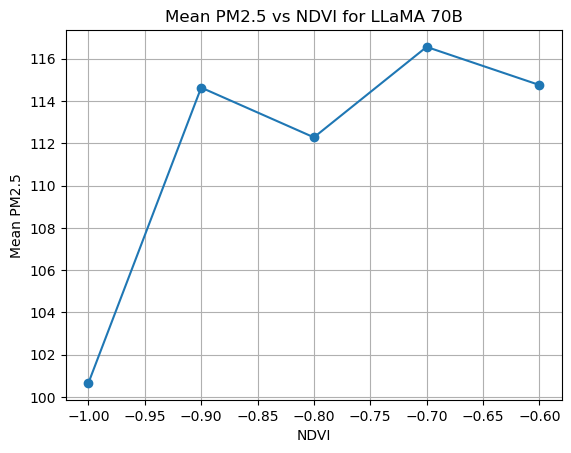

In [9]:
llama_70b["pm2.5"] = pd.to_numeric(llama_70b["pm2.5"], errors="coerce")
llama_grouped = llama_70b.groupby("ndvi").agg(
    mean_pm25=("pm2.5", "mean"),
    var_pm25=("pm2.5", "var")
).reset_index()
print(llama_grouped)
plt.plot(llama_grouped['ndvi'], llama_grouped['mean_pm25'], marker='o')
plt.grid()
plt.xlabel("NDVI")
plt.ylabel("Mean PM2.5")
plt.title("Mean PM2.5 vs NDVI for LLaMA 70B")
plt.show()


Mean & Variance per NDVI bin:

Mean & Variance per NDVI bin:

Mean & Variance per NDVI bin:

Mean & Variance per NDVI bin:


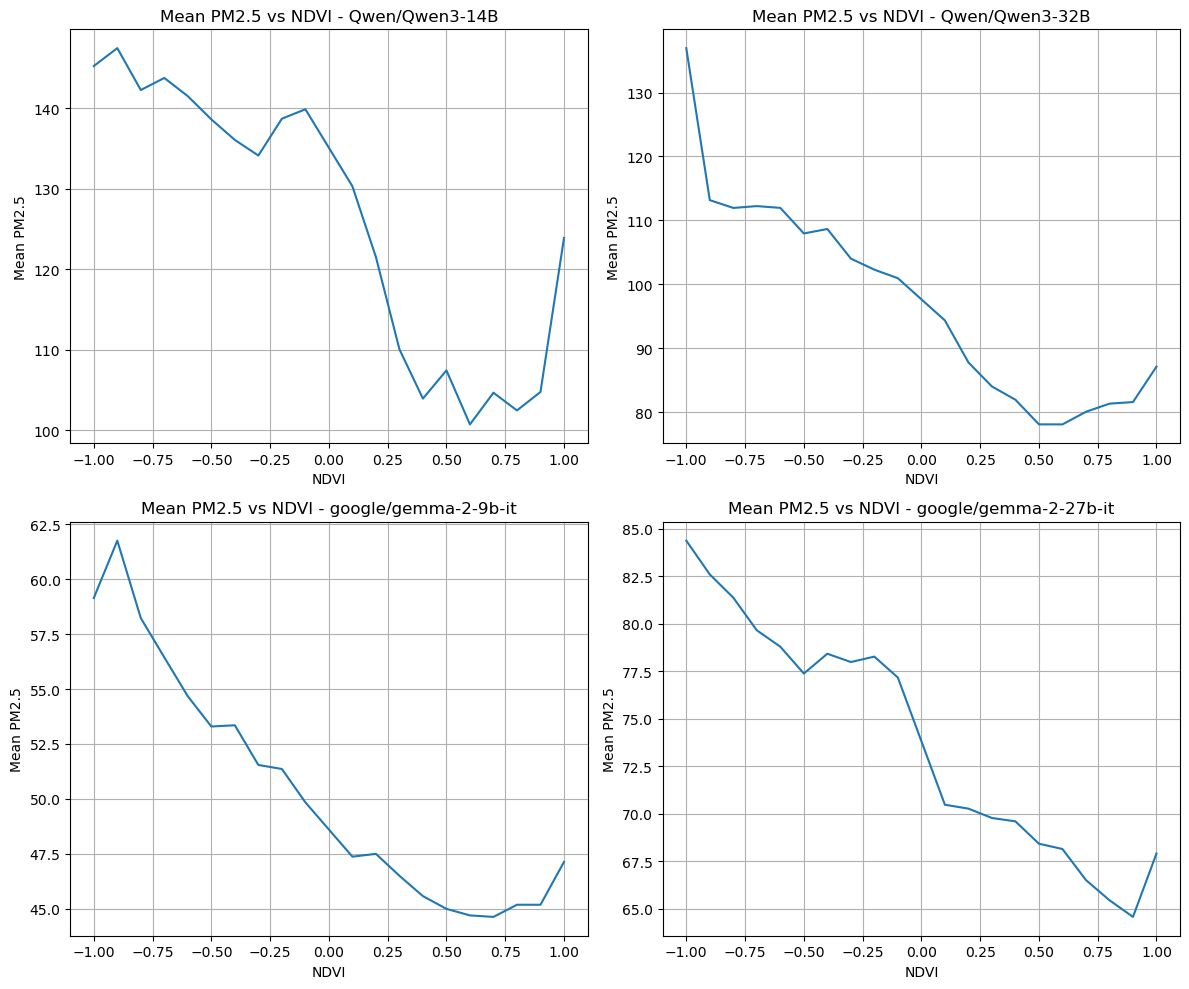

In [35]:
plt.subplots(2, 2, figsize=(12, 10))
count = 1
def get_mean_variance(df):
    df_grouped = df.groupby("ndvi").agg(
    mean_pm25=("pm2.5", "mean"),
    var_pm25=("pm2.5", "var")
    ).reset_index()

    global count
    print("\nMean & Variance per NDVI bin:")
    # print(df_grouped)
    model_name = df['model'].iloc[0]
    plt.subplot(2, 2, count)
    plt.plot(df_grouped["ndvi"], df_grouped["mean_pm25"])
    plt.title(f"Mean PM2.5 vs NDVI - {model_name}")
    plt.xlabel("NDVI")
    plt.ylabel("Mean PM2.5")
    plt.tight_layout()
    plt.grid()
    count += 1
    return df_grouped
qwen_14b_stats = get_mean_variance(qwen_14b)
qwen_32b_stats = get_mean_variance(qwen_32b)
gemma_9b_stats = get_mean_variance(gemma_9b)
gemma_27b_stats = get_mean_variance(gemma_27b)
plt.show()

In [16]:
qwen_32b.dropna(inplace=True)
gemma_9b.dropna(inplace=True)

In [17]:
def get_pearson_spearman(df):
    pear, _ = pearsonr(df["ndvi"], df["pm2.5"])
    spear, _ = spearmanr(df["ndvi"], df["pm2.5"])
    print(f"\nPearson correlation: {pear:.4f}")
    print(f"Spearman correlation: {spear:.4f}")

In [18]:
mean_qwen14 = get_pearson_spearman(qwen_14b)
mean_qwen32 = get_pearson_spearman(qwen_32b)
mean_gemma9 = get_pearson_spearman(gemma_9b)
mean_gemma27 = get_pearson_spearman(gemma_27b)


Pearson correlation: -0.3479
Spearman correlation: -0.3314

Pearson correlation: -0.2508
Spearman correlation: -0.2349

Pearson correlation: -0.1619
Spearman correlation: -0.1538

Pearson correlation: -0.1782
Spearman correlation: -0.1693


In [19]:
ndvi_arr = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [36]:
pear_qwen_14 = np.corrcoef(qwen_14b_stats['mean_pm25'], ndvi_arr)
pear_qwen_32 = np.corrcoef(qwen_32b_stats['mean_pm25'], ndvi_arr)
pear_gemma_9 = np.corrcoef(gemma_9b_stats['mean_pm25'], ndvi_arr)
pear_gemma_27 = np.corrcoef(gemma_27b_stats['mean_pm25'], ndvi_arr)


print("Pearson (mean per NDVI) - Qwen 14B:", pear_qwen_14[0,1])
print("Pearson (mean per NDVI) - Qwen 32B:", pear_qwen_32[0,1])
print("Pearson (mean per NDVI) - Gemma 9B:", pear_gemma_9[0,1])
print("Pearson (mean per NDVI) - Gemma 27B:", pear_gemma_27[0,1])

Pearson (mean per NDVI) - Qwen 14B: -0.8870691648777707
Pearson (mean per NDVI) - Qwen 32B: -0.9255312349491917
Pearson (mean per NDVI) - Gemma 9B: -0.9374957081851691
Pearson (mean per NDVI) - Gemma 27B: -0.9707654347772076



Mean & Variance per NDVI bin:

Mean & Variance per NDVI bin:

Mean & Variance per NDVI bin:

Mean & Variance per NDVI bin:


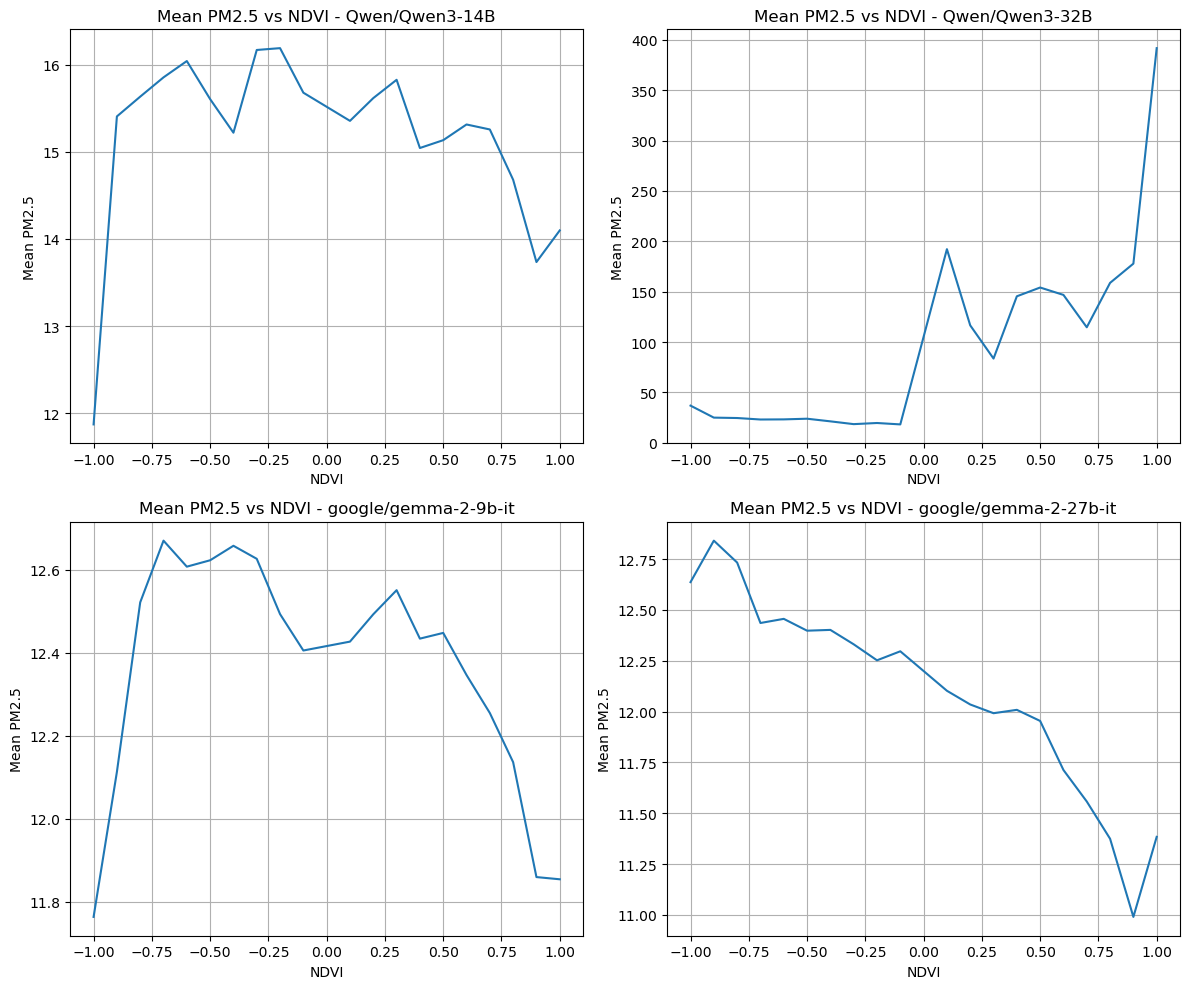

In [37]:
plt.subplots(2, 2, figsize=(12, 10))
count = 1
def get_mean_variance(df):
    df_grouped = df.groupby("ndvi").agg(
    mean_pm25=("pm2.5", "mean"),
    var_pm25=("pm2.5", "var")
    ).reset_index()

    global count
    print("\nMean & Variance per NDVI bin:")
    # print(df_grouped)
    model_name = df['model'].iloc[0]
    plt.subplot(2, 2, count)
    plt.plot(df_grouped["ndvi"], df_grouped["mean_pm25"])
    plt.title(f"Mean PM2.5 vs NDVI - {model_name}")
    plt.xlabel("NDVI")
    plt.ylabel("Mean PM2.5")
    plt.tight_layout()
    plt.grid()
    count += 1
    return df_grouped
qwen_14b_usa_stats = get_mean_variance(qwen_14b_usa)
qwen_32b_usa_stats = get_mean_variance(qwen_32b_usa)
gemma_9b_usa_stats = get_mean_variance(gemma_9b_usa)
gemma_27b_usa_stats = get_mean_variance(gemma_27b_usa)
plt.show()

In [38]:
qwen_14b_usa.dropna(inplace=True)
qwen_32b_usa.dropna(inplace=True)
gemma_9b_usa.dropna(inplace=True)
gemma_27b_usa.dropna(inplace=True)

In [39]:
pear_qwen_14_usa = np.corrcoef(qwen_14b_usa_stats['mean_pm25'], ndvi_arr)
pear_qwen_32_usa = np.corrcoef(qwen_32b_usa_stats['mean_pm25'], ndvi_arr)
pear_gemma_9_usa = np.corrcoef(gemma_9b_usa_stats['mean_pm25'], ndvi_arr)
pear_gemma_27_usa = np.corrcoef(gemma_27b_usa_stats['mean_pm25'], ndvi_arr)


print("Pearson (mean per NDVI) - Qwen 14B:", pear_qwen_14_usa[0,1])
print("Pearson (mean per NDVI) - Qwen 32B:", pear_qwen_32_usa[0,1])
print("Pearson (mean per NDVI) - Gemma 9B:", pear_gemma_9_usa[0,1])
print("Pearson (mean per NDVI) - Gemma 27B:", pear_gemma_27_usa[0,1])

Pearson (mean per NDVI) - Qwen 14B: -0.11995289961462748
Pearson (mean per NDVI) - Qwen 32B: 0.7955106100368462
Pearson (mean per NDVI) - Gemma 9B: -0.3221255029063708
Pearson (mean per NDVI) - Gemma 27B: -0.9496093698837571


In [40]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

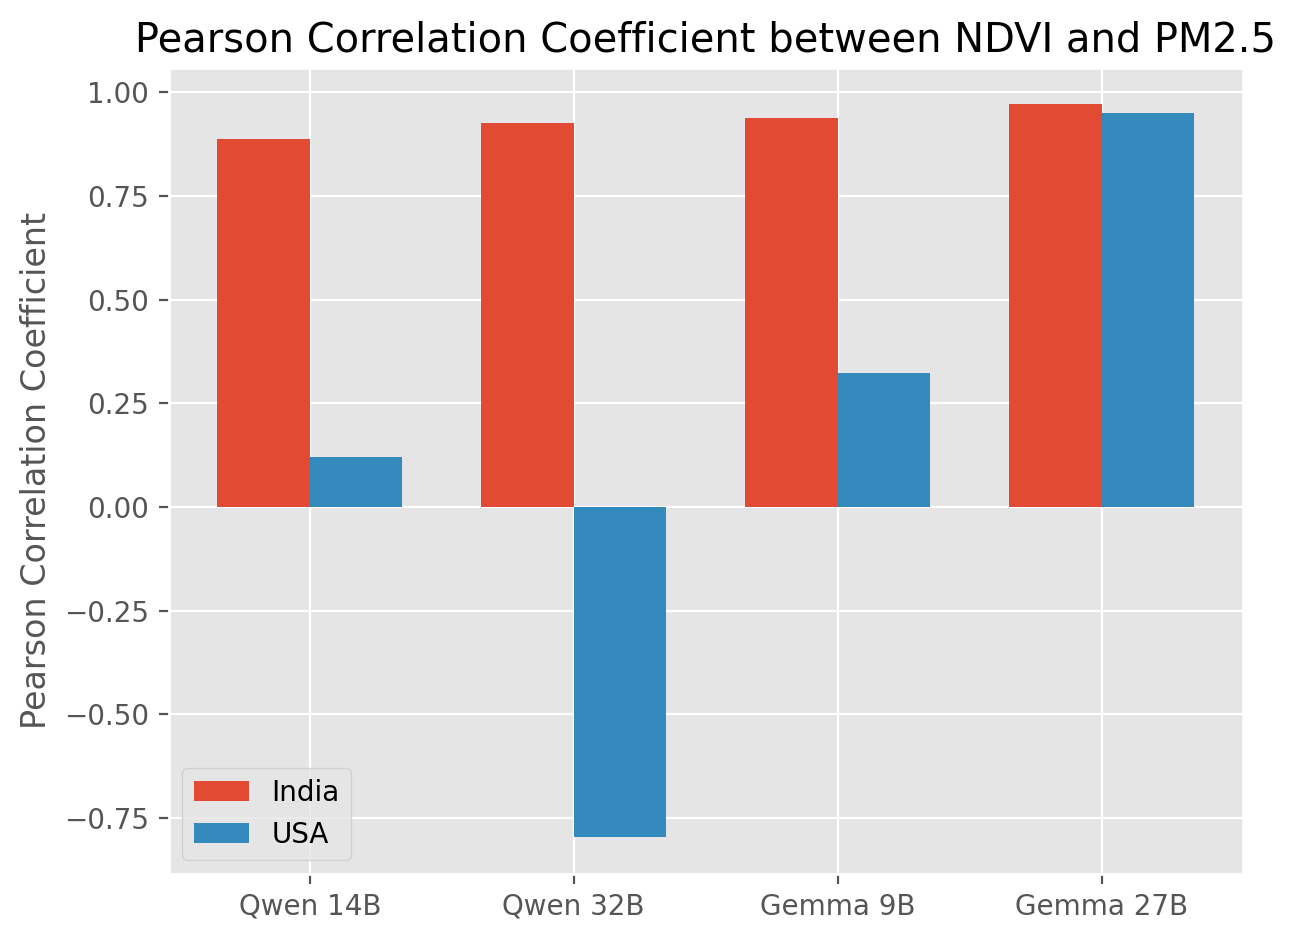

In [42]:
# x positions for model groups
x = np.arange(4)

# width of each bar
w = 0.35

plt.style.use("ggplot")


plt.bar(x - w/2, 
        [-pear_qwen_14[0,1], -pear_qwen_32[0,1], -pear_gemma_9[0,1], -pear_gemma_27[0,1]],
        width=w, label="India")

plt.bar(x + w/2, 
        [-pear_qwen_14_usa[0,1], -pear_qwen_32_usa[0,1], -pear_gemma_9_usa[0,1], -pear_gemma_27_usa[0,1]],
        width=w, label="USA")

plt.xticks(x, ['Qwen 14B', 'Qwen 32B', 'Gemma 9B', 'Gemma 27B'])
plt.ylabel("Pearson Correlation Coefficient")
plt.title("Pearson Correlation Coefficient between NDVI and PM2.5")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
pear_llama_70 = np.corrcoef(llama_grouped['mean_pm25'], [-1, -0.9, -0.8, -0.7, -0.6])